In [1]:
from standardInclude import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
import pandas
import sys
import os
import csv
import numpy as np
import time
import calendar
import datetime

In [3]:
tempVec = []
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |

with open("./test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        if(not('calo' in row[1])):
            continue
        try:
            caloNum = int((row[1].split("calo"))[1].split('temps')[0])
            #print(caloNum)
            ding = []
            for x in row[2][1:-1].split(','):
                if float(x) > 0 and float(x) < 100:
                    ding.append(float(x))
                else:
                    ding.append(float('nan'))
            
            #print(ding)
            vec = [caloNum, ding, np.nanmean(ding), 
                            time.strptime(row[3], timeFormatTemp), 
                            row[3],
                            calendar.timegm(time.strptime(row[3], timeFormatTemp)) ]
            for x in ding:
                #print(x)
                vec.append(float(x))
            tempVec.append(vec)
        except:
            print("ERROR: ", row)

            line_count += 1
            if(line_count > 50):
                break


print(len(tempVec))
print("Creating dataframe") 

df = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','timestring','time','xtal0', 'xtal1', 'xtal2', 'xtal3', 
                                        'xtal4', 'xtal5', 'xtal6', 'xtal7', 'xtal8', 'xtal9', 'xtal10', 'xtal11', 'xtal12', 'xtal13', 
                                        'xtal14', 'xtal15', 'xtal16', 'xtal17', 'xtal18', 'xtal19', 'xtal20', 'xtal21', 'xtal22', 
                                        'xtal23', 'xtal24', 'xtal25', 'xtal26', 'xtal27', 'xtal28', 'xtal29', 'xtal30', 'xtal31', 
                                        'xtal32', 'xtal33', 'xtal34', 'xtal35', 'xtal36', 'xtal37', 'xtal38', 'xtal39', 'xtal40', 
                                        'xtal41', 'xtal42', 'xtal43', 'xtal44', 'xtal45', 'xtal46', 'xtal47', 'xtal48', 'xtal49', 
                                        'xtal50', 'xtal51', 'xtal52', 'xtal53'])


df.timefull = pandas.to_datetime(df.timestring)

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


ERROR:  ['85979897', 'calo14temps', '{0,35.625,36.3125,35.75,37,37.9375,38.625,40.375,39.5,0,35,35.8125,36.6875,38.25,39.3125,40.25,41.1875,38.4375,0,0,35.5625,35.875,38.0625,0,41.1875,41.9375,40.625,0,34.6875,36.25,0,39.4375,40.5625,41.25,0,40.1875,0,34.6875,35.5625,37.25,37.625,39.5625,41.375,42.8125,41.875,0,34.8125,35.6875,37.25,37.875,39.25,40.3125,41,40.25}', '2019-04-10 07:37:23', 't']
1999999
Creating dataframe


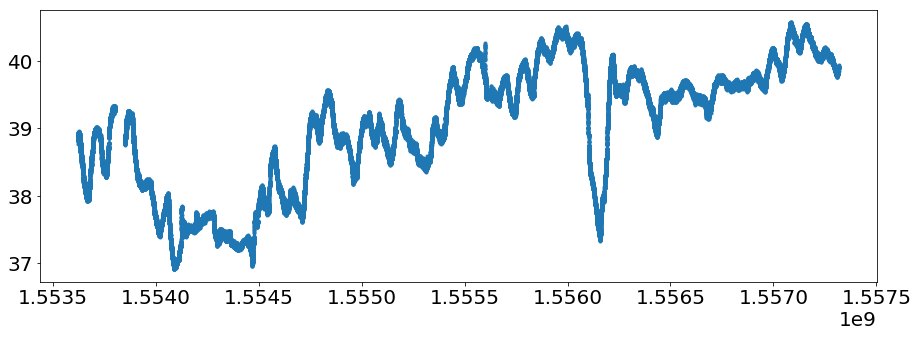

In [4]:
fig,ax = plt.subplots(figsize=(15,5))
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.plot(df['time'].loc[df['calo'] == 1],df['avgtemp'].loc[df['calo'] == 1],".")
plt.show()

In [5]:
df.head()

,calo,temps,avgtemp,timefull,timestring,time,xtal0,xtal1,xtal2,xtal3,...,xtal44,xtal45,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53
0,7,"[nan, nan, 34.9375, 35.0, 35.875, 36.125, 37.8...",37.505952,2019-04-07 08:16:12.359822,2019-04-07 08:16:12.359822,1554624972,NaN,NaN,34.9375,35.0000,...,40.8750,NaN,NaN,35.4375,NaN,37.1250,38.5625,39.6250,41.4375,39.3750
1,3,"[nan, 36.625, 37.25, 38.125, 38.6875, 38.875, ...",39.469444,2019-05-07 07:54:33.041246,2019-05-07 07:54:33.041246,1557215673,NaN,36.625,37.2500,38.1250,...,42.1250,NaN,36.125,37.6250,38.2500,38.8750,39.9375,41.1250,41.5000,40.5625
2,7,"[nan, nan, 36.9375, 37.0625, 37.875, 38.125, 3...",39.532738,2019-05-07 09:07:51.743961,2019-05-07 09:07:51.743961,1557220071,NaN,NaN,36.9375,37.0625,...,42.9375,NaN,NaN,37.4375,NaN,39.0625,40.5625,41.6250,43.5000,41.4375
3,11,"[nan, 36.125, 36.3125, 37.3125, 38.0, 38.5, 39...",38.992021,2019-05-06 07:44:16.757613,2019-05-06 07:44:16.757613,1557128656,NaN,36.125,36.3125,37.3125,...,41.9375,NaN,36.000,37.1250,38.4375,38.8125,39.4375,41.2500,42.3125,40.6875
4,7,"[nan, nan, 36.75, 36.8125, 37.625, 37.9375, 39...",39.297619,2019-05-03 19:28:08.073110,2019-05-03 19:28:08.07311,1556911688,NaN,NaN,36.7500,36.8125,...,42.6875,NaN,NaN,37.1875,NaN,38.8750,40.3125,41.4375,43.2500,41.1250


In [6]:
timeFormatTemp = "%Y-%m-%d %H:%M:%S"
runVec = []
with open("./runsByUnixTime.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        try:
            runNum = int(row[0])

            vec = [runNum,
                   row[1],
                   calendar.timegm(time.strptime(row[1], timeFormatTemp)) ,
                   row[3],
                   calendar.timegm(time.strptime(row[3], timeFormatTemp)) ]

            runVec.append(vec)
        except:
            print("ERROR: ", row)

            line_count += 1
            if(line_count > 50):
                break

runVec.sort()
dfruns = pandas.DataFrame(runVec, columns=['run', 'timeStartString', 'timeStart', 'timeEndString', 'timeEnd'] )

dfconstants = pandas.read_csv("./nearlineConstantsByRun.csv", header=None, names=['run','calo','allXtalAvg','xtal0', 'xtal1', 'xtal2', 'xtal3', 
                                        'xtal4', 'xtal5', 'xtal6', 'xtal7', 'xtal8', 'xtal9', 'xtal10', 'xtal11', 'xtal12', 'xtal13', 
                                        'xtal14', 'xtal15', 'xtal16', 'xtal17', 'xtal18', 'xtal19', 'xtal20', 'xtal21', 'xtal22', 
                                        'xtal23', 'xtal24', 'xtal25', 'xtal26', 'xtal27', 'xtal28', 'xtal29', 'xtal30', 'xtal31', 
                                        'xtal32', 'xtal33', 'xtal34', 'xtal35', 'xtal36', 'xtal37', 'xtal38', 'xtal39', 'xtal40', 
                                        'xtal41', 'xtal42', 'xtal43', 'xtal44', 'xtal45', 'xtal46', 'xtal47', 'xtal48', 'xtal49', 
                                        'xtal50', 'xtal51', 'xtal52', 'xtal53'], sep='|')

In [7]:
timeStartVec = []
for i, row in dfconstants.iterrows():
    #if(i>30):
    #    break
    #print(row)
    runNum = int(row['run'])
    dfrunsi = dfruns.loc[dfruns['run'] == runNum]
    #print(dfrunsi.head())
    timeStart = int(dfrunsi['timeStart'])
    timeEnd = int(dfrunsi['timeEnd'])
    #print(runNum, timeStart, timeEnd)
    
    if(timeStart > timeEnd):
        timeStartVec.append(timeEnd)
    else:
        timeStartVec.append(timeStart)

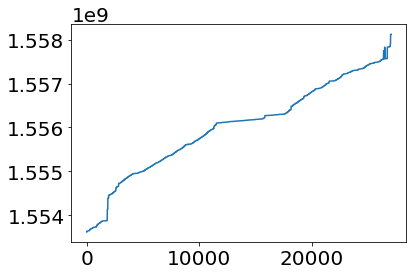

In [8]:
plt.plot(timeStartVec)
plt.show()

In [9]:
dfconstants['startTime'] = timeStartVec

In [10]:
dfconstants['startDateTime'] =  pandas.to_datetime(dfconstants['startTime'], unit='s')

In [11]:
(dfruns.head())

,run,timeStartString,timeStart,timeEndString,timeEnd
0,18921,2018-10-05 17:03:21,1538759001,2018-10-05 17:05:40,1538759140
1,24376,2019-03-26 20:01:04,1553630464,2019-03-26 17:17:43,1553620663
2,24377,2019-03-26 22:40:26,1553640026,2019-03-26 20:01:25,1553630485
3,24378,2019-03-26 22:40:26,1553640026,2019-03-26 22:40:45,1553640045
4,24379,2019-03-26 23:06:09,1553641569,2019-03-26 23:19:29,1553642369


In [12]:
dfconstants.head()

,run,calo,allXtalAvg,xtal0,xtal1,xtal2,xtal3,xtal4,xtal5,xtal6,...,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53,startTime,startDateTime
0,24376,1,1.085579,1.087128,1.074646,1.085862,1.077046,1.081559,1.088421,1.078755,...,1.070506,1.084291,1.081976,1.082223,1.086705,1.103218,1.091027,1.100756,1553620663,2019-03-26 17:17:43
1,24376,2,1.107961,1.123205,1.081786,1.092894,1.112216,1.094066,1.084154,1.091012,...,1.087825,1.084207,1.084869,1.104259,1.093214,1.098607,1.109942,1.122996,1553620663,2019-03-26 17:17:43
2,24376,3,1.133308,1.139977,1.130775,1.122356,1.125784,1.108941,1.132453,1.123176,...,1.124913,1.131847,1.161195,1.148973,1.133223,1.113076,1.163093,1.106141,1553620663,2019-03-26 17:17:43
3,24376,4,1.074316,1.060995,1.075573,1.061977,1.055520,1.068372,1.066472,1.072976,...,1.062991,1.075184,1.070501,1.076177,1.085311,1.068791,1.085782,1.068991,1553620663,2019-03-26 17:17:43
4,24376,5,1.064717,1.059452,1.059897,1.052175,1.056518,1.054049,1.062887,1.059190,...,1.058020,1.056718,1.053954,1.054519,1.077316,1.062633,1.063211,1.060573,1553620663,2019-03-26 17:17:43


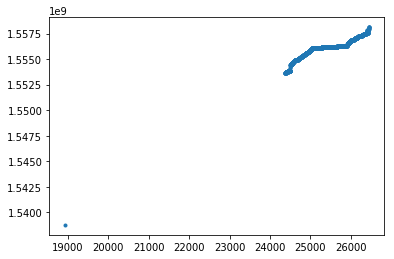

In [13]:
setint()
plt.plot(dfruns['run'],dfruns['timeStart'],".")
plt.show()
noint()

In [14]:
(dfconstants.head())

,run,calo,allXtalAvg,xtal0,xtal1,xtal2,xtal3,xtal4,xtal5,xtal6,...,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53,startTime,startDateTime
0,24376,1,1.085579,1.087128,1.074646,1.085862,1.077046,1.081559,1.088421,1.078755,...,1.070506,1.084291,1.081976,1.082223,1.086705,1.103218,1.091027,1.100756,1553620663,2019-03-26 17:17:43
1,24376,2,1.107961,1.123205,1.081786,1.092894,1.112216,1.094066,1.084154,1.091012,...,1.087825,1.084207,1.084869,1.104259,1.093214,1.098607,1.109942,1.122996,1553620663,2019-03-26 17:17:43
2,24376,3,1.133308,1.139977,1.130775,1.122356,1.125784,1.108941,1.132453,1.123176,...,1.124913,1.131847,1.161195,1.148973,1.133223,1.113076,1.163093,1.106141,1553620663,2019-03-26 17:17:43
3,24376,4,1.074316,1.060995,1.075573,1.061977,1.055520,1.068372,1.066472,1.072976,...,1.062991,1.075184,1.070501,1.076177,1.085311,1.068791,1.085782,1.068991,1553620663,2019-03-26 17:17:43
4,24376,5,1.064717,1.059452,1.059897,1.052175,1.056518,1.054049,1.062887,1.059190,...,1.058020,1.056718,1.053954,1.054519,1.077316,1.062633,1.063211,1.060573,1553620663,2019-03-26 17:17:43


In [15]:
runVec = []

for i, row in dfruns.iterrows():
    #print(row)
    runNum = row['run']
    timeStart = row['timeStart']
    timeEnd = row['timeEnd']
    
    if(timeEnd < timeStart):
        timeStart = row['timeEnd']
        timeEnd = row['timeStart']
    
    #print(runNum, timeStart, timeEnd, timeEnd - timeStart)
    constantVec = []

    dfi = df.loc[df['time'] > timeStart].loc[df['time'] < timeEnd]

    if(len(dfi) > 0): 
        #print("****************************************************************************")
        #print("Entries in DF:", len(dfi))
        #print(row)
        for calo in range(1,25):
            dfi2 = dfi.loc[dfi['calo'] == calo]
            xtalsMeanCaloi = []
            for xtal in range(54):
                xtalMean = np.mean( dfi2['xtal'+str(xtal)] )
                xtalsMeanCaloi.append( xtalMean )
            ding = [runNum, calo, np.nanmean(xtalsMeanCaloi), timeStart]
            for x in xtalsMeanCaloi:
                ding.append(x)
            runVec.append( ding )

#print(runVec)

dfconstantsByRun = pandas.DataFrame(runVec, columns=['run', 'calo', 'allCaloAvg', 'timeStart', 'xtal0', 'xtal1', 'xtal2', 'xtal3', 
                                        'xtal4', 'xtal5', 'xtal6', 'xtal7', 'xtal8', 'xtal9', 'xtal10', 'xtal11', 'xtal12', 'xtal13', 
                                        'xtal14', 'xtal15', 'xtal16', 'xtal17', 'xtal18', 'xtal19', 'xtal20', 'xtal21', 'xtal22', 
                                        'xtal23', 'xtal24', 'xtal25', 'xtal26', 'xtal27', 'xtal28', 'xtal29', 'xtal30', 'xtal31', 
                                        'xtal32', 'xtal33', 'xtal34', 'xtal35', 'xtal36', 'xtal37', 'xtal38', 'xtal39', 'xtal40', 
                                        'xtal41', 'xtal42', 'xtal43', 'xtal44', 'xtal45', 'xtal46', 'xtal47', 'xtal48', 'xtal49', 
                                        'xtal50', 'xtal51', 'xtal52', 'xtal53'])

(dfconstantsByRun.head())

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


,run,calo,allCaloAvg,timeStart,xtal0,xtal1,xtal2,xtal3,xtal4,xtal5,...,xtal44,xtal45,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53
0,24376,1,38.892959,1553620663,33.2656,35.696131,37.042857,36.729762,37.702679,38.468452,...,41.840774,NaN,35.871429,36.642262,38.338988,39.427083,40.573810,41.848512,42.747024,41.762798
1,24376,2,38.830904,1553620663,NaN,36.865988,36.625581,37.230814,37.962209,38.468023,...,41.553198,NaN,35.092151,37.360465,38.552907,39.269186,40.268895,41.451453,41.889244,39.811628
2,24376,3,38.187069,1553620663,NaN,35.359830,35.978459,36.840716,37.453580,37.601335,...,40.792476,NaN,34.899272,36.389563,37.155340,37.668386,38.693568,39.865595,40.243022,39.302184
3,24376,4,37.862111,1553620663,NaN,34.767020,35.823382,35.465123,36.682199,NaN,...,41.076451,NaN,34.355469,36.270368,37.203125,37.463728,NaN,40.302455,41.449219,39.238002
4,24376,5,38.961956,1553620663,NaN,35.437500,35.157523,35.002828,36.880656,36.865385,...,41.497455,NaN,34.126131,35.326075,NaN,37.469740,39.418552,40.555147,41.700226,40.598982


In [16]:
timeStartVec2 = []
for i, row in dfconstantsByRun.iterrows():
    #if(i>30):
    #    break
    #print(row)
    runNum = int(row['run'])
    dfrunsi = dfruns.loc[dfruns['run'] == runNum]
    #print(dfrunsi.head())
    timeStart = int(dfrunsi['timeStart'])
    timeEnd = int(dfrunsi['timeEnd'])
    #print(runNum, timeStart, timeEnd)
    
    if(timeStart > timeEnd):
        timeStartVec2.append(timeEnd)
    else:
        timeStartVec2.append(timeStart)

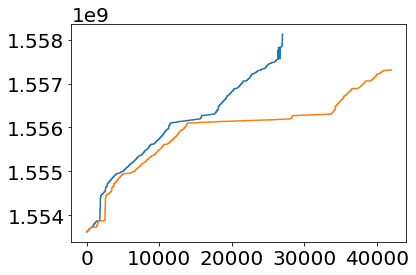

In [17]:
plt.plot(timeStartVec)
plt.plot(timeStartVec2)
plt.show()

In [18]:
dfconstantsByRun['startTime'] = timeStartVec2

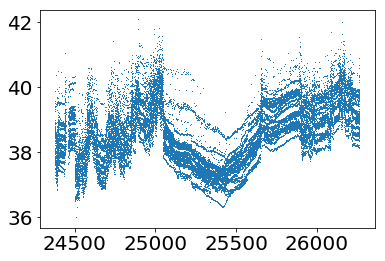

In [19]:
plt.plot(dfconstantsByRun['run'], dfconstantsByRun['allCaloAvg'],",")
plt.show()

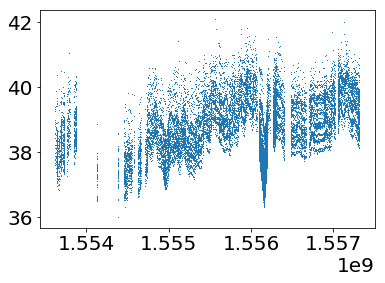

In [20]:
plt.plot(dfconstantsByRun['startTime'], dfconstantsByRun['allCaloAvg'],",")
plt.show()

In [21]:
dfconstantsByRun['startDateTime'] =  pandas.to_datetime(dfconstantsByRun['startTime'], unit='s')

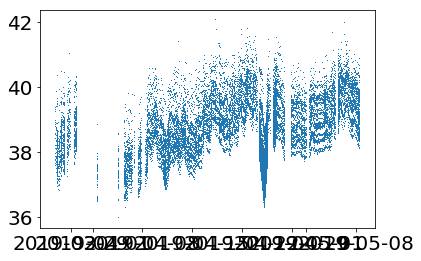

In [22]:
plt.plot(dfconstantsByRun['startDateTime'], dfconstantsByRun['allCaloAvg'],",")
plt.show()

In [23]:
runMin = dfconstantsByRun['run'].min()
runMax = dfconstantsByRun['run'].max()
width = 9
height = 6

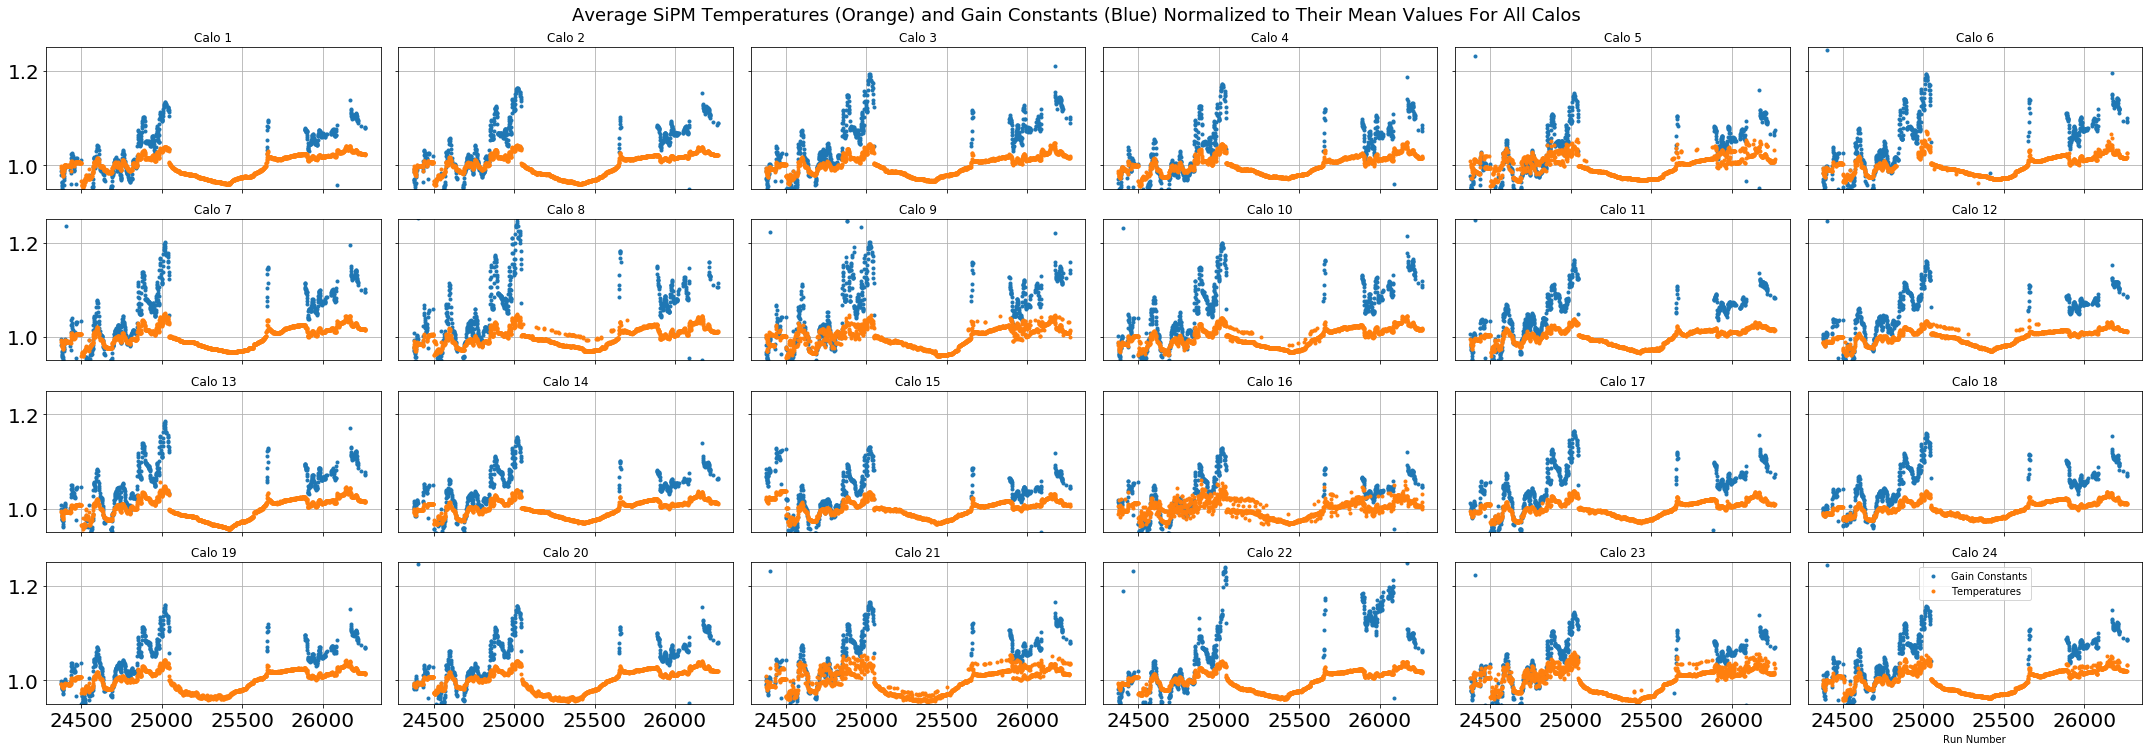

In [24]:
noint()
fig, ax = plt.subplots(4,6,figsize=(30,10),sharey=True,sharex=True)
for calo in range(1,25):
    i = calo - 1
    axi = ax[int((i)/6)][(i) % 6]
    axi.set_title("Calo "+str(calo))

    dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
    dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]
    
    #axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
    axi.plot(dfConsti['run'], dfConsti['allXtalAvg']/np.mean(dfConsti['allXtalAvg']), ".", label = 'Gain Constants')
    axi.plot(dfTempsi['run'], dfTempsi['allCaloAvg']/np.mean(dfTempsi['allCaloAvg']), ".", label = 'Temperatures')
    
    axi.set_ylim(0.95,1.25)
    #axi.set_xlim(24500,25000)
    axi.grid()
    
    #plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) Normalized to Their Mean Values For All Calos", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Number")

plt.show()    

In [25]:
dfTempsi.head()

,run,calo,allCaloAvg,timeStart,xtal0,xtal1,xtal2,xtal3,xtal4,xtal5,...,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53,startTime,startDateTime
23,24376,24,38.907924,1553620663,NaN,35.799890,35.941064,36.804276,37.791393,38.128289,...,35.335800,37.300164,37.925164,38.574561,39.754112,40.335526,41.216557,39.837445,1553620663,2019-03-26 17:17:43
47,24377,24,38.673588,1553630485,NaN,35.551190,35.697024,36.563988,37.557440,37.897024,...,35.086012,37.060417,37.688393,38.334524,39.523214,40.100000,40.985417,39.601786,1553630485,2019-03-26 20:01:25
71,24378,24,38.558511,1553640026,NaN,35.437500,35.562500,36.437500,37.437500,37.812500,...,35.000000,36.937500,37.562500,38.250000,39.375000,39.937500,40.875000,39.437500,1553640026,2019-03-26 22:40:26
95,24379,24,38.453324,1553641569,NaN,35.318750,35.468750,36.343750,37.337500,37.681250,...,34.862500,36.831250,37.450000,38.106250,39.300000,39.875000,40.756250,39.400000,1553641569,2019-03-26 23:06:09
119,24380,24,38.474924,1553642771,NaN,35.366071,35.491071,36.357143,37.375000,37.705357,...,34.875000,36.883929,37.464286,38.133929,39.330357,39.892857,40.794643,39.401786,1553642771,2019-03-26 23:26:11


In [26]:
dfConsti.head()

,run,calo,allXtalAvg,xtal0,xtal1,xtal2,xtal3,xtal4,xtal5,xtal6,...,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53,startTime,startDateTime
23,24376,24,1.142881,1.131241,1.132257,1.135695,1.119961,1.132486,1.139750,1.122342,...,1.136485,1.134430,1.133042,1.136000,1.140519,1.151696,1.148438,1.175675,1553620663,2019-03-26 17:17:43
47,24377,24,1.128755,1.115257,1.117813,1.121616,1.107964,1.119588,1.123406,1.112534,...,1.119827,1.119897,1.119442,1.122484,1.125871,1.135928,1.134304,1.154743,1553630485,2019-03-26 20:01:25
71,24378,24,1.114732,1.102837,1.105622,1.107815,1.098063,1.108675,1.112413,1.100767,...,1.106610,1.106898,1.107875,1.111788,1.114122,1.125328,1.121238,1.137982,1553640026,2019-03-26 22:40:26
95,24379,24,1.109634,1.096030,1.099680,1.103530,1.092230,1.105130,1.103910,1.098770,...,1.105560,1.098970,1.105320,1.104350,1.110100,1.119570,1.112580,1.132290,1553641569,2019-03-26 23:06:09
119,24380,24,1.109872,1.103949,1.098271,1.099291,1.088469,1.100899,1.106629,1.100639,...,1.104673,1.099353,1.101429,1.105166,1.110707,1.113406,1.119051,1.126190,1553642771,2019-03-26 23:26:11


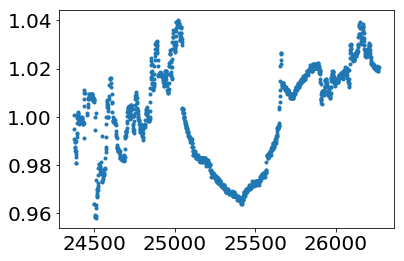

In [27]:
plt.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]),".", label = 'Temperatures')
plt.show()

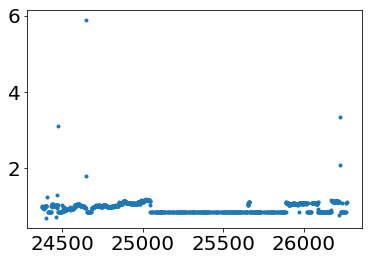

In [28]:
plt.plot(dfConsti['run'], dfConsti['xtal'+str(xtal)]/np.mean(dfConsti['xtal'+str(xtal)]), ".", label = 'Gain Contstants')

plt.show()

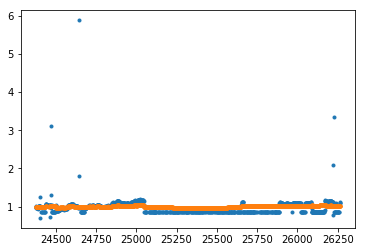

In [29]:
setint()

plt.plot(dfConsti['run'], dfConsti['xtal'+str(xtal)]/np.mean(dfConsti['xtal'+str(xtal)]), ".", label = 'Gain Contstants')
plt.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]),".", label = 'Temperatures')

plt.show()

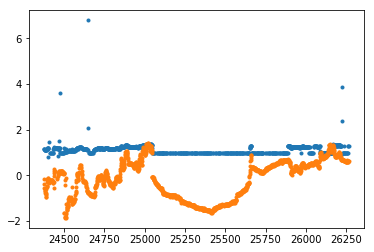

In [30]:
setint()

plt.plot(dfConsti['run'], dfConsti['xtal'+str(xtal)], ".", label = 'Gain Contstants')
plt.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]-40, ".", label = 'Temperatures')

plt.show()

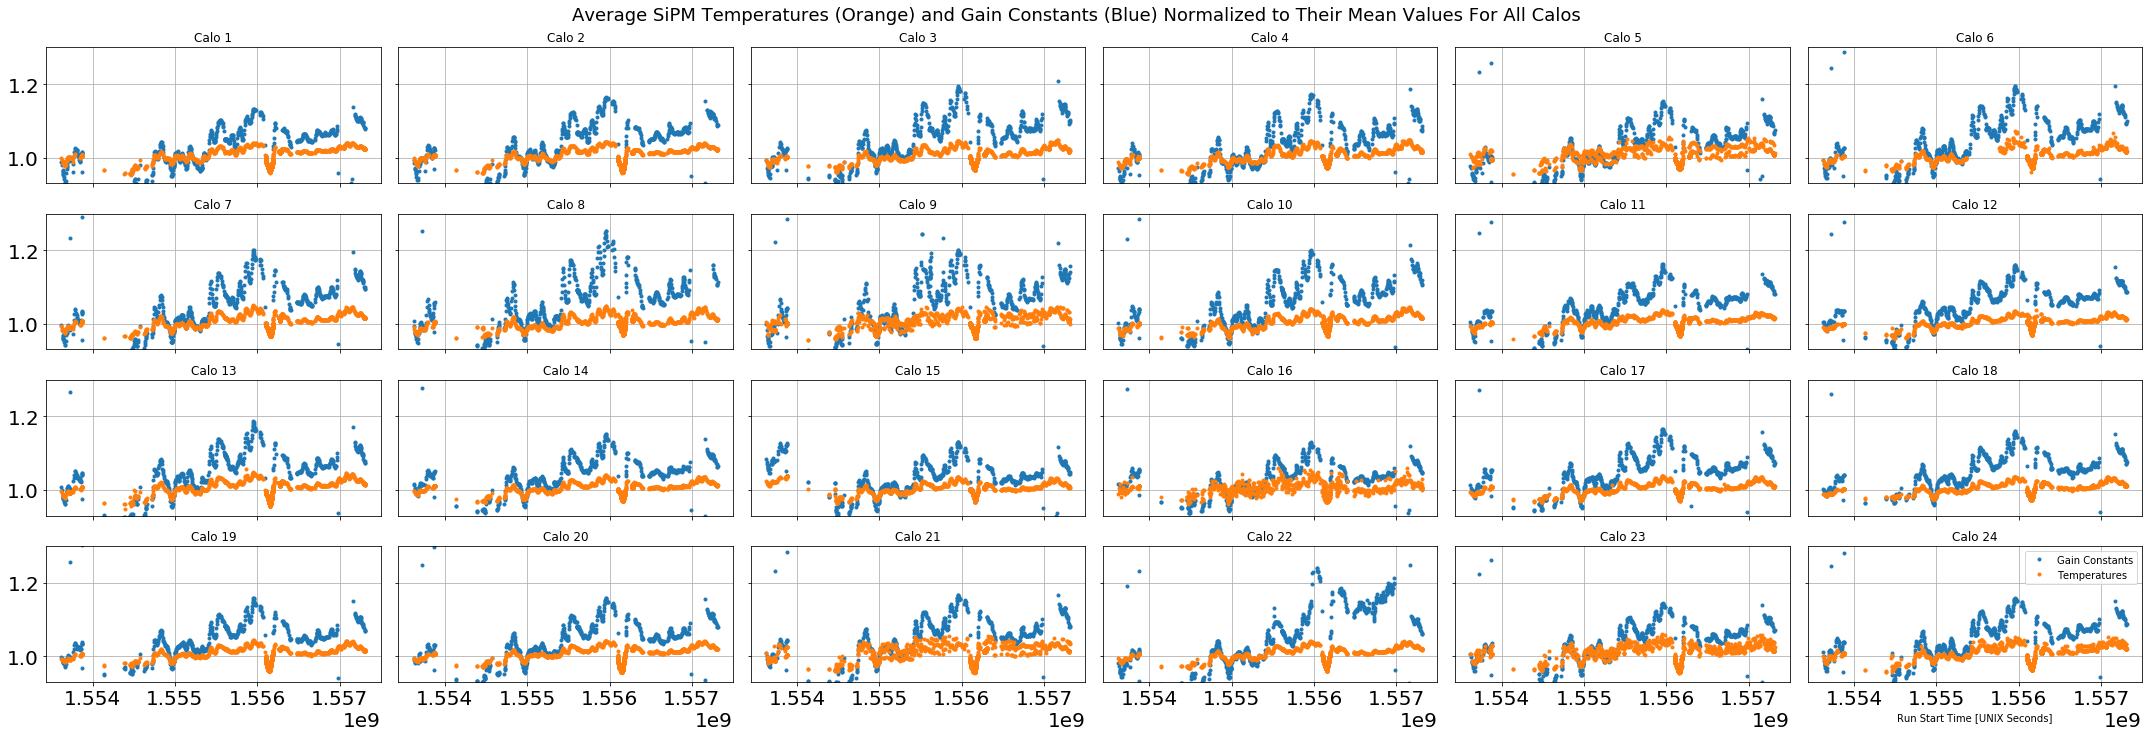

In [31]:
noint()
fig, ax = plt.subplots(4,6,figsize=(30,10),sharey=True,sharex=True)
for calo in range(1,25):
    i = calo - 1
    axi = ax[int((i)/6)][(i) % 6]
    axi.set_title("Calo "+str(calo))

    dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
    dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]
    
    #axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
    axi.plot(dfConsti['startTime'], dfConsti['allXtalAvg']/np.mean(dfConsti['allXtalAvg']), ".", label = 'Gain Constants')
    axi.plot(dfTempsi['startTime'], dfTempsi['allCaloAvg']/np.mean(dfTempsi['allCaloAvg']), ".", label = 'Temperatures')
    
    axi.set_ylim(0.93,1.3)
    #axi.set_xlim(24500,25000)
    axi.grid()
    
    #plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) Normalized to Their Mean Values For All Calos", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time [UNIX Seconds]")

plt.show()    

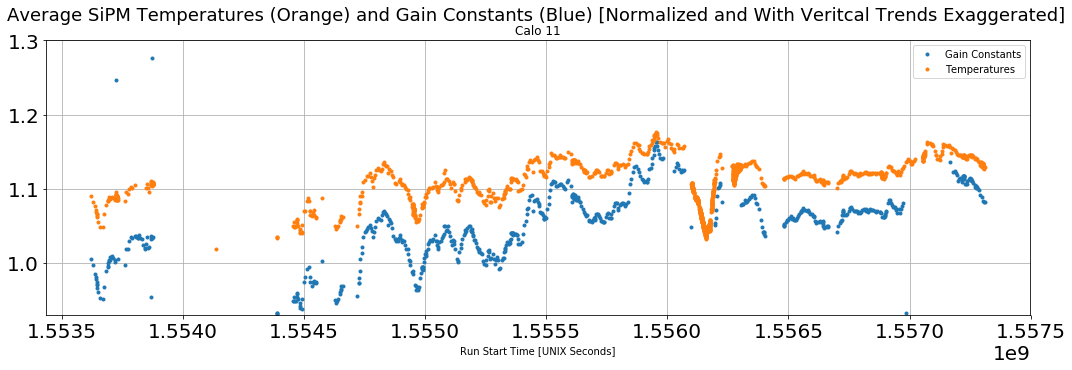

In [32]:
noint()
fig, ax = plt.subplots(figsize=(15,5),sharey=True,sharex=True)
for calo in range(11,12):
    i = calo - 1
    axi = ax
    axi.set_title("Calo "+str(calo))

    dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
    dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]
    
    #axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
    axi.plot(dfConsti['startTime'], dfConsti['allXtalAvg']/np.mean(dfConsti['allXtalAvg']), ".", label = 'Gain Constants')
    axi.plot(dfTempsi['startTime'], dfTempsi['allCaloAvg']/np.mean(dfTempsi['allCaloAvg'])*2 - 0.9, ".", label = 'Temperatures')
    
    axi.set_ylim(0.93,1.3)
    #axi.set_xlim(24500,25000)
    axi.grid()
    
    #plt.xticks(rotation=90)

plt.legend(loc=1)
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) [Normalized and With Veritcal Trends Exaggerated]", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time [UNIX Seconds]")

plt.show()    

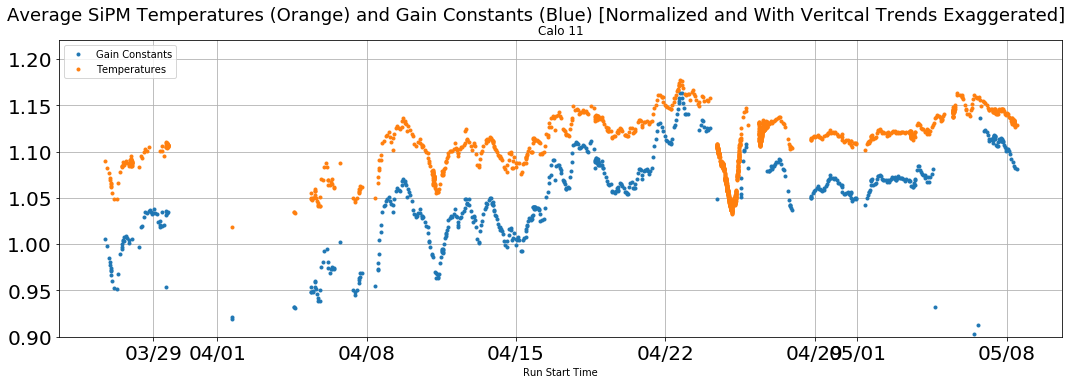

In [33]:
#noint()
fig, ax = plt.subplots(figsize=(15,5),sharey=True,sharex=True)
calo = 11
i = calo - 1
axi = ax
axi.set_title("Calo "+str(calo))

dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]

#axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
axi.plot(dfConsti['startDateTime'], dfConsti['allXtalAvg']/np.mean(dfConsti['allXtalAvg']), ".", label = 'Gain Constants')
axi.plot(dfTempsi['startDateTime'], dfTempsi['allCaloAvg']/np.mean(dfTempsi['allCaloAvg'])*2 - 0.9, ".", label = 'Temperatures')

axi.set_ylim(0.9,1.22)
#axi.set_xlim(24500,25000)
axi.grid()

plt.xticks(rotation=0)

myFmt = matplotlib.dates.DateFormatter("%m/%d") 
axi.xaxis.set_major_formatter(myFmt)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

plt.legend(loc=2)
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) [Normalized and With Veritcal Trends Exaggerated]", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time")

plt.show()    

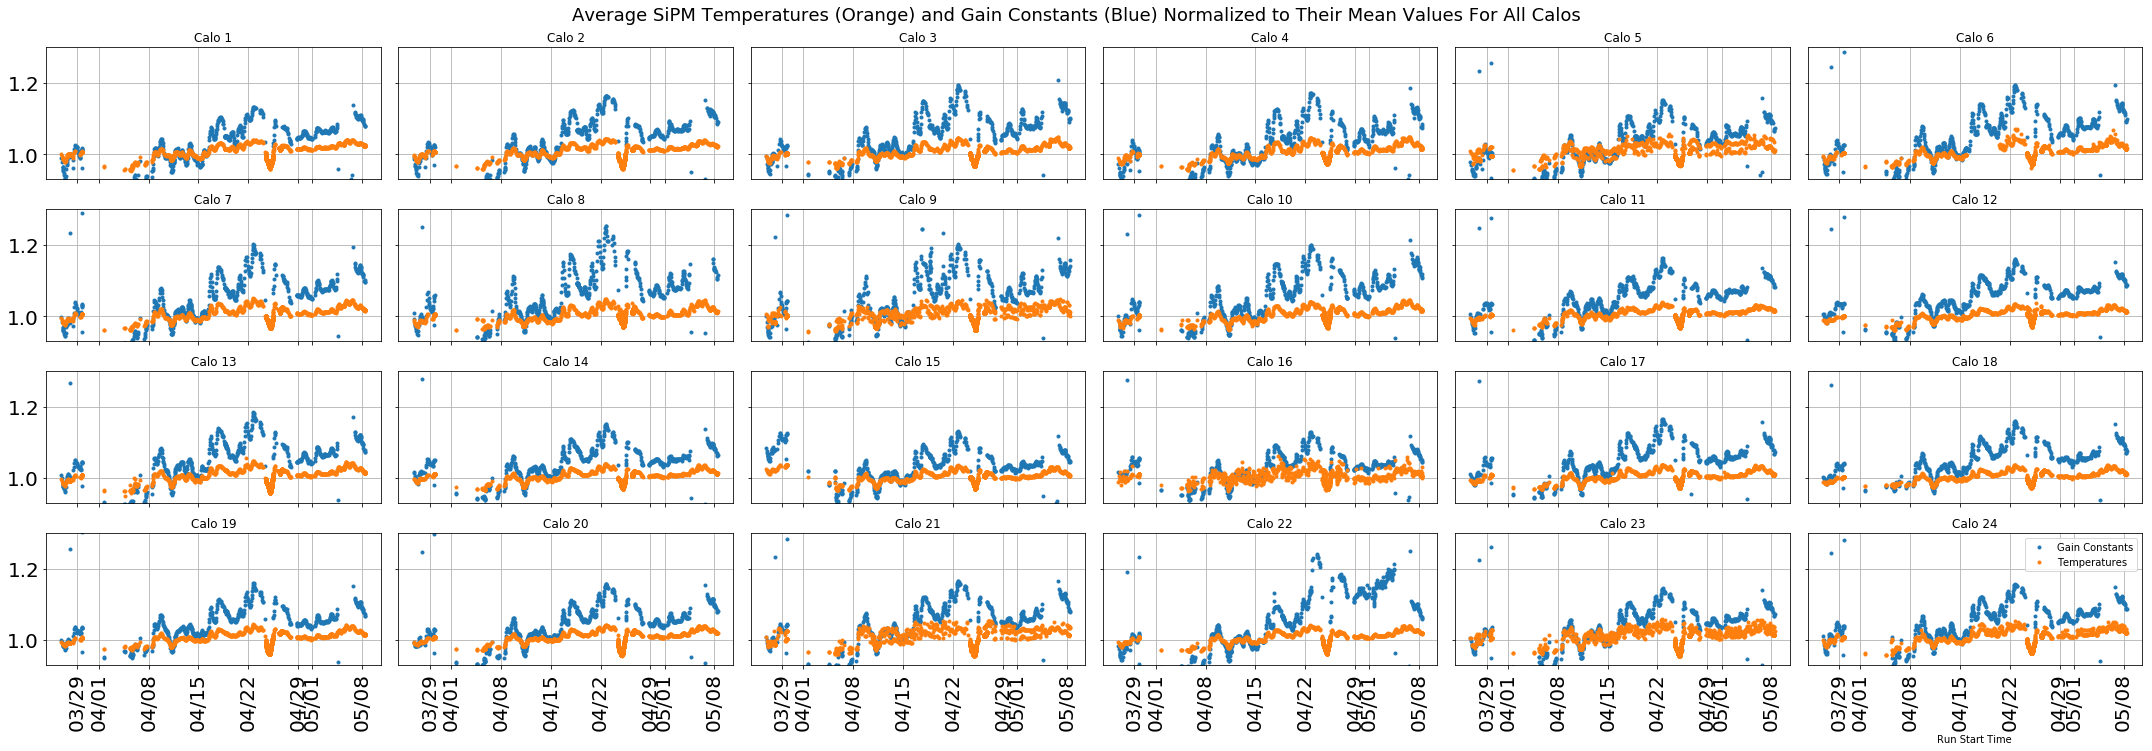

In [34]:
noint()
fig, ax = plt.subplots(4,6,figsize=(30,10),sharey=True,sharex=True)
for calo in range(1,25):
    i = calo - 1
    axi = ax[int((i)/6)][(i) % 6]
    axi.set_title("Calo "+str(calo))

    dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
    dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]
    
    #axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
    axi.plot(dfConsti['startDateTime'], dfConsti['allXtalAvg']/np.mean(dfConsti['allXtalAvg']), ".", label = 'Gain Constants')
    axi.plot(dfTempsi['startDateTime'], dfTempsi['allCaloAvg']/np.mean(dfTempsi['allCaloAvg']), ".", label = 'Temperatures')
    
    axi.set_ylim(0.93,1.3)
    #axi.set_xlim(24500,25000)
    axi.grid()
    axi.xaxis.set_major_formatter(myFmt)

    
    matplotlib.pyplot.sca(axi)
    plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) Normalized to Their Mean Values For All Calos", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time")

plt.show()    

In [35]:
print([x/np.mean(dfTempsi['allCaloAvg'])*2 - 0.9 for x in range(30,50,1)])

[0.6427023235378263, 0.6941257343224206, 0.7455491451070148, 0.7969725558916091, 0.8483959666762032, 0.8998193774607975, 0.9512427882453917, 1.0026661990299859, 1.05408960981458, 1.1055130205991746, 1.1569364313837687, 1.2083598421683628, 1.259783252952957, 1.3112066637375515, 1.3626300745221456, 1.4140534853067397, 1.4654768960913338, 1.5169003068759284, 1.5683237176605225, 1.6197471284451166]


In [36]:
print([x/np.mean(dfTempsi['allCaloAvg'])*2 - 0.9 for x in range(30,50,1)])

[0.6427023235378263, 0.6941257343224206, 0.7455491451070148, 0.7969725558916091, 0.8483959666762032, 0.8998193774607975, 0.9512427882453917, 1.0026661990299859, 1.05408960981458, 1.1055130205991746, 1.1569364313837687, 1.2083598421683628, 1.259783252952957, 1.3112066637375515, 1.3626300745221456, 1.4140534853067397, 1.4654768960913338, 1.5169003068759284, 1.5683237176605225, 1.6197471284451166]


In [37]:
print([(x+0.9)/2*np.mean(dfTempsi['allCaloAvg']) for x in np.linspace(1,2,10)])

[36.94815203835556, 39.108862683873426, 41.2695733293913, 43.430283974909166, 45.59099462042704, 47.751705265944906, 49.912415911462766, 52.07312655698064, 54.233837202498506, 56.39454784801638]


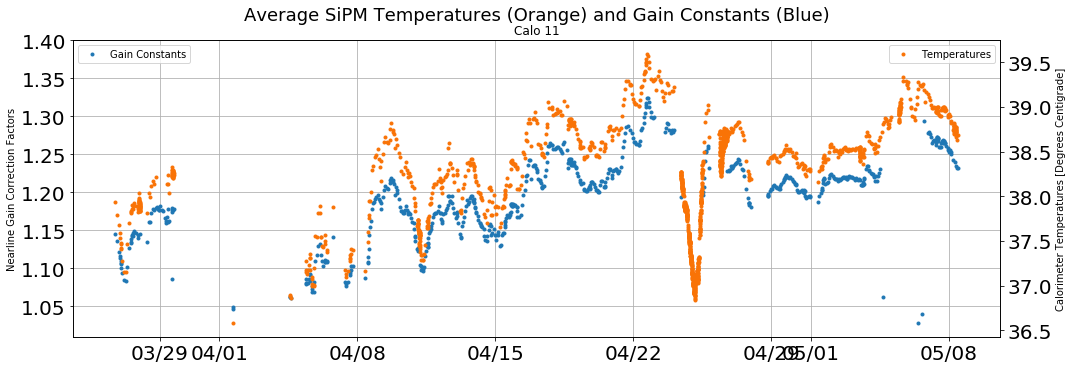

In [38]:
#noint()
fig, ax = plt.subplots(figsize=(15,5),sharey=True,sharex=True)
calo = 11
i = calo - 1
axi = ax
axi.set_title("Calo "+str(calo))

dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]

#axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
axi.plot(dfConsti['startDateTime'], dfConsti['allXtalAvg'], ".", label = 'Gain Constants')

ax2 = axi.twinx() 
ax2.plot(dfTempsi['startDateTime'], dfTempsi['allCaloAvg'], ".", color='xkcd:orange', label = 'Temperatures')

axi.set_ylim(1.01,1.4)
#axi.set_xlim(24500,25000)
axi.grid()

plt.xticks(rotation=0)

myFmt = matplotlib.dates.DateFormatter("%m/%d") 
axi.xaxis.set_major_formatter(myFmt)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

axi.legend(loc=2)
ax2.legend(loc=1)

axi.set_ylabel("Nearline Gain Correction Factors")
ax2.set_ylabel("Calorimeter Temperatures [Degrees Centigrade]")


plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue)", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time")

plt.show()    

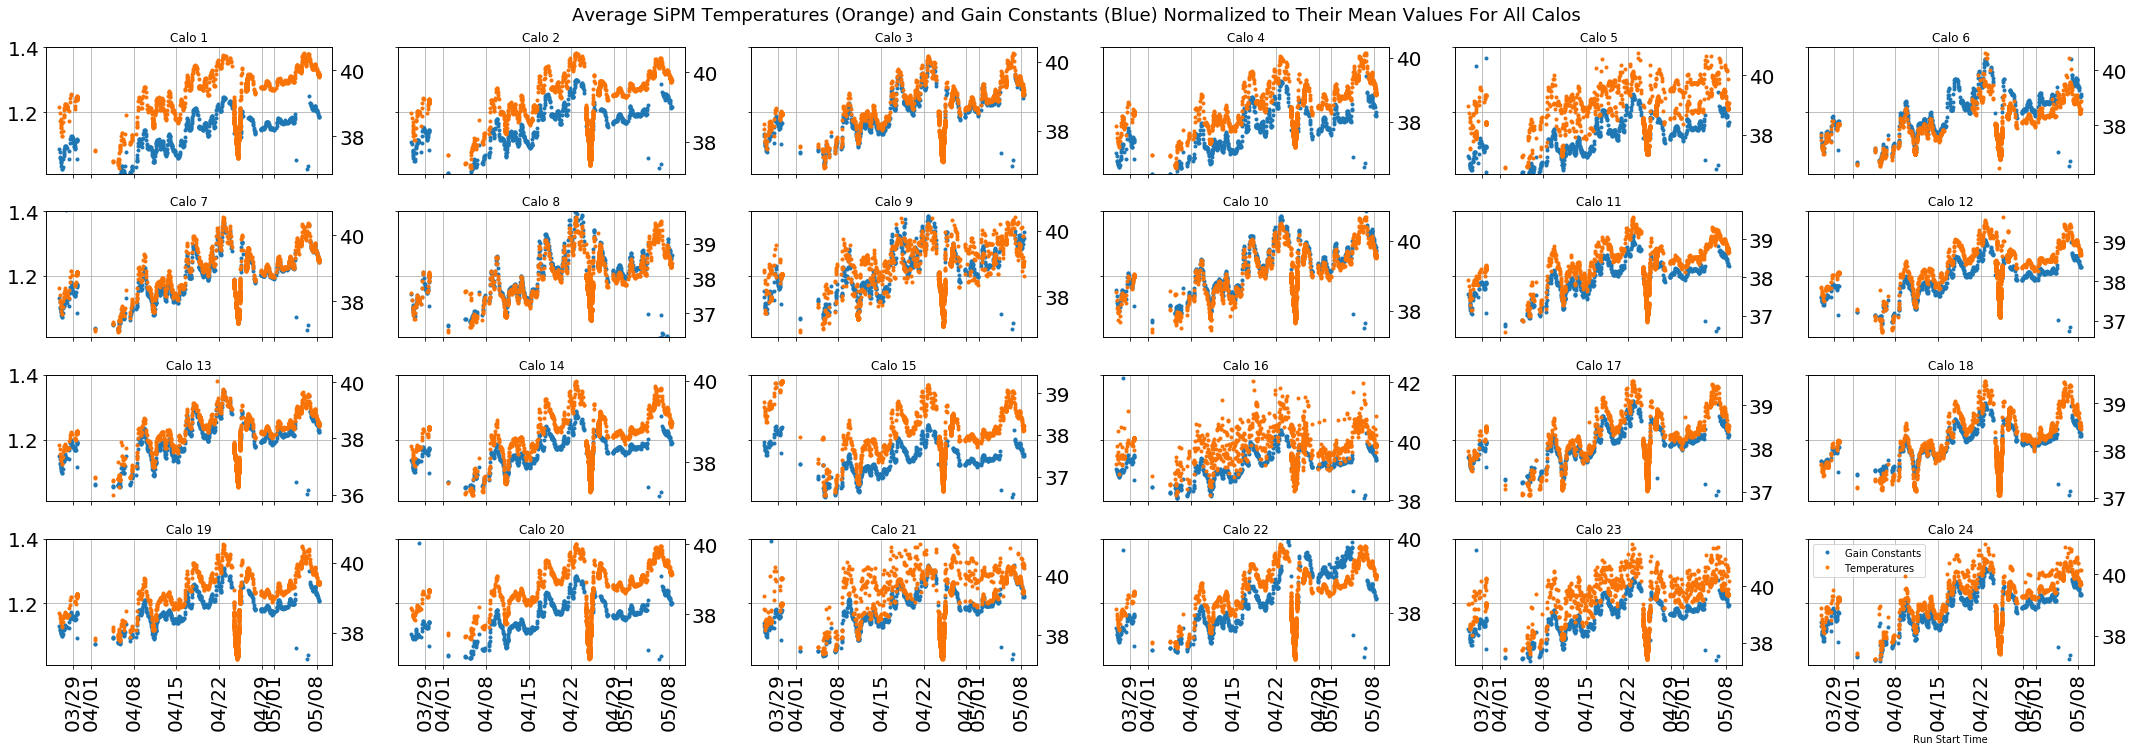

In [39]:
noint()
fig, ax = plt.subplots(4,6,figsize=(30,10),sharey=True,sharex=True)
for calo in range(1,25):
    i = calo - 1
    axi = ax[int((i)/6)][(i) % 6]
    axi.set_title("Calo "+str(calo))

    dfTempsi = dfconstantsByRun.loc[dfconstantsByRun['calo'] == calo]
    dfConsti = dfconstants.loc[dfconstants['calo'] == calo].loc[dfconstants['run'] > runMin - 1].loc[dfconstants['run'] < runMax + 1]
    
    #axi.plot(dfTempsi['run'], dfTempsi['xtal'+str(xtal)]/np.mean(dfTempsi['xtal'+str(xtal)]), ".", label = 'Temperatures')
    axi.plot(dfConsti['startDateTime'], dfConsti['allXtalAvg'], ".", label = 'Gain Constants')
    axi.plot(dfTempsi['startDateTime'], dfTempsi['allCaloAvg'], ".", label = 'Temperatures')
    
    ax2 = axi.twinx() 
    ax2.plot(dfTempsi['startDateTime'], dfTempsi['allCaloAvg'], ".", color='xkcd:orange', label = 'Temperatures')
    #ax2.set_ylabel("Calorimeter Temperatures [Degrees Centigrade]")

    
    axi.set_ylim(1.01,1.4)
    #axi.set_xlim(24500,25000)
    axi.grid()
    axi.xaxis.set_major_formatter(myFmt)

    
    matplotlib.pyplot.sca(axi)
    plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.suptitle("Average SiPM Temperatures (Orange) and Gain Constants (Blue) Normalized to Their Mean Values For All Calos", 
             fontsize=18, y = 1.02)
plt.xlabel("Run Start Time")

plt.show()    

In [40]:
tempVsConstVec = []

for i, row in dfconstantsByRun.iterrows():
    #if(i>30):
    #    break
    #print(row)
    runNum = int(row['run'])
    caloNum = int(row['calo'])
    if(caloNum != 11):
        continue
    try:
        dfconstantsi = dfconstants.loc[dfconstants['run'] == runNum].loc[dfconstants['calo'] == caloNum]
        #print(row['calo'],row['allCaloAvg'])
        #print(int(dfconstantsi['calo']), float(dfconstantsi['allXtalAvg']))

        #tempVsConstVec.append( [runNum, caloNum, float(dfconstantsi['allXtalAvg']), row['allCaloAvg']] )
        for xtal in range(54):
            tempVsConstVec.append( [runNum, caloNum, xtal, float(dfconstantsi['xtal'+str(xtal)]), row['xtal'+str(xtal)]] )
    except:
        print("ERROR: ", runNum)


ERROR:  24403
ERROR:  24405
ERROR:  24406
ERROR:  24407
ERROR:  24408
ERROR:  24409
ERROR:  24411
ERROR:  24412
ERROR:  24413
ERROR:  24414
ERROR:  24416
ERROR:  24418
ERROR:  24419
ERROR:  24420
ERROR:  24422
ERROR:  24423
ERROR:  24425
ERROR:  24426
ERROR:  24427
ERROR:  24428
ERROR:  24430
ERROR:  24463
ERROR:  24467
ERROR:  24471
ERROR:  24473
ERROR:  24476
ERROR:  24479
ERROR:  24480
ERROR:  24481
ERROR:  24483
ERROR:  24485
ERROR:  24487
ERROR:  24488
ERROR:  24489
ERROR:  24491
ERROR:  24493
ERROR:  24495
ERROR:  24496
ERROR:  24497
ERROR:  24507
ERROR:  24511
ERROR:  24516
ERROR:  24520
ERROR:  24524
ERROR:  24529
ERROR:  24534
ERROR:  24549
ERROR:  24559
ERROR:  24573
ERROR:  24642
ERROR:  24644
ERROR:  24646
ERROR:  24649
ERROR:  24650
ERROR:  24651
ERROR:  24652
ERROR:  24653
ERROR:  24654
ERROR:  24657
ERROR:  24658
ERROR:  24661
ERROR:  24663
ERROR:  24667
ERROR:  24669
ERROR:  24670
ERROR:  24671
ERROR:  24672
ERROR:  24673
ERROR:  24675
ERROR:  24676
ERROR:  24679
ERROR:

In [41]:
#print(tempVsConstVec)
runsi, calosi, xtalsi, constsi, tempsi = zip(*tempVsConstVec)
dfTempsVsConsts = pandas.DataFrame(tempVsConstVec, columns=['run','calo','xtal','const','temp'])

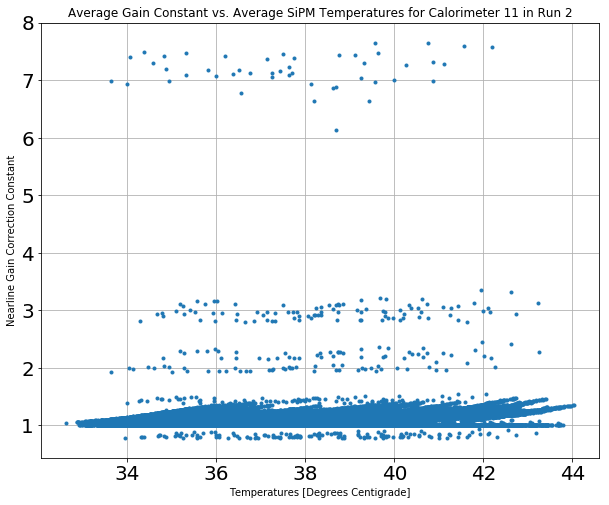

In [42]:
noint()
fig,ax = plt.subplots(figsize=(10,8))
plt.title("Average Gain Constant vs. Average SiPM Temperatures for Calorimeter 11 in Run 2")
plt.xlabel("Temperatures [Degrees Centigrade]")
plt.ylabel("Nearline Gain Correction Constant")
#plt.ylim(1.03,1.40)
plt.plot(dfTempsVsConsts['temp'],dfTempsVsConsts['const'],".")
plt.grid()
plt.show()

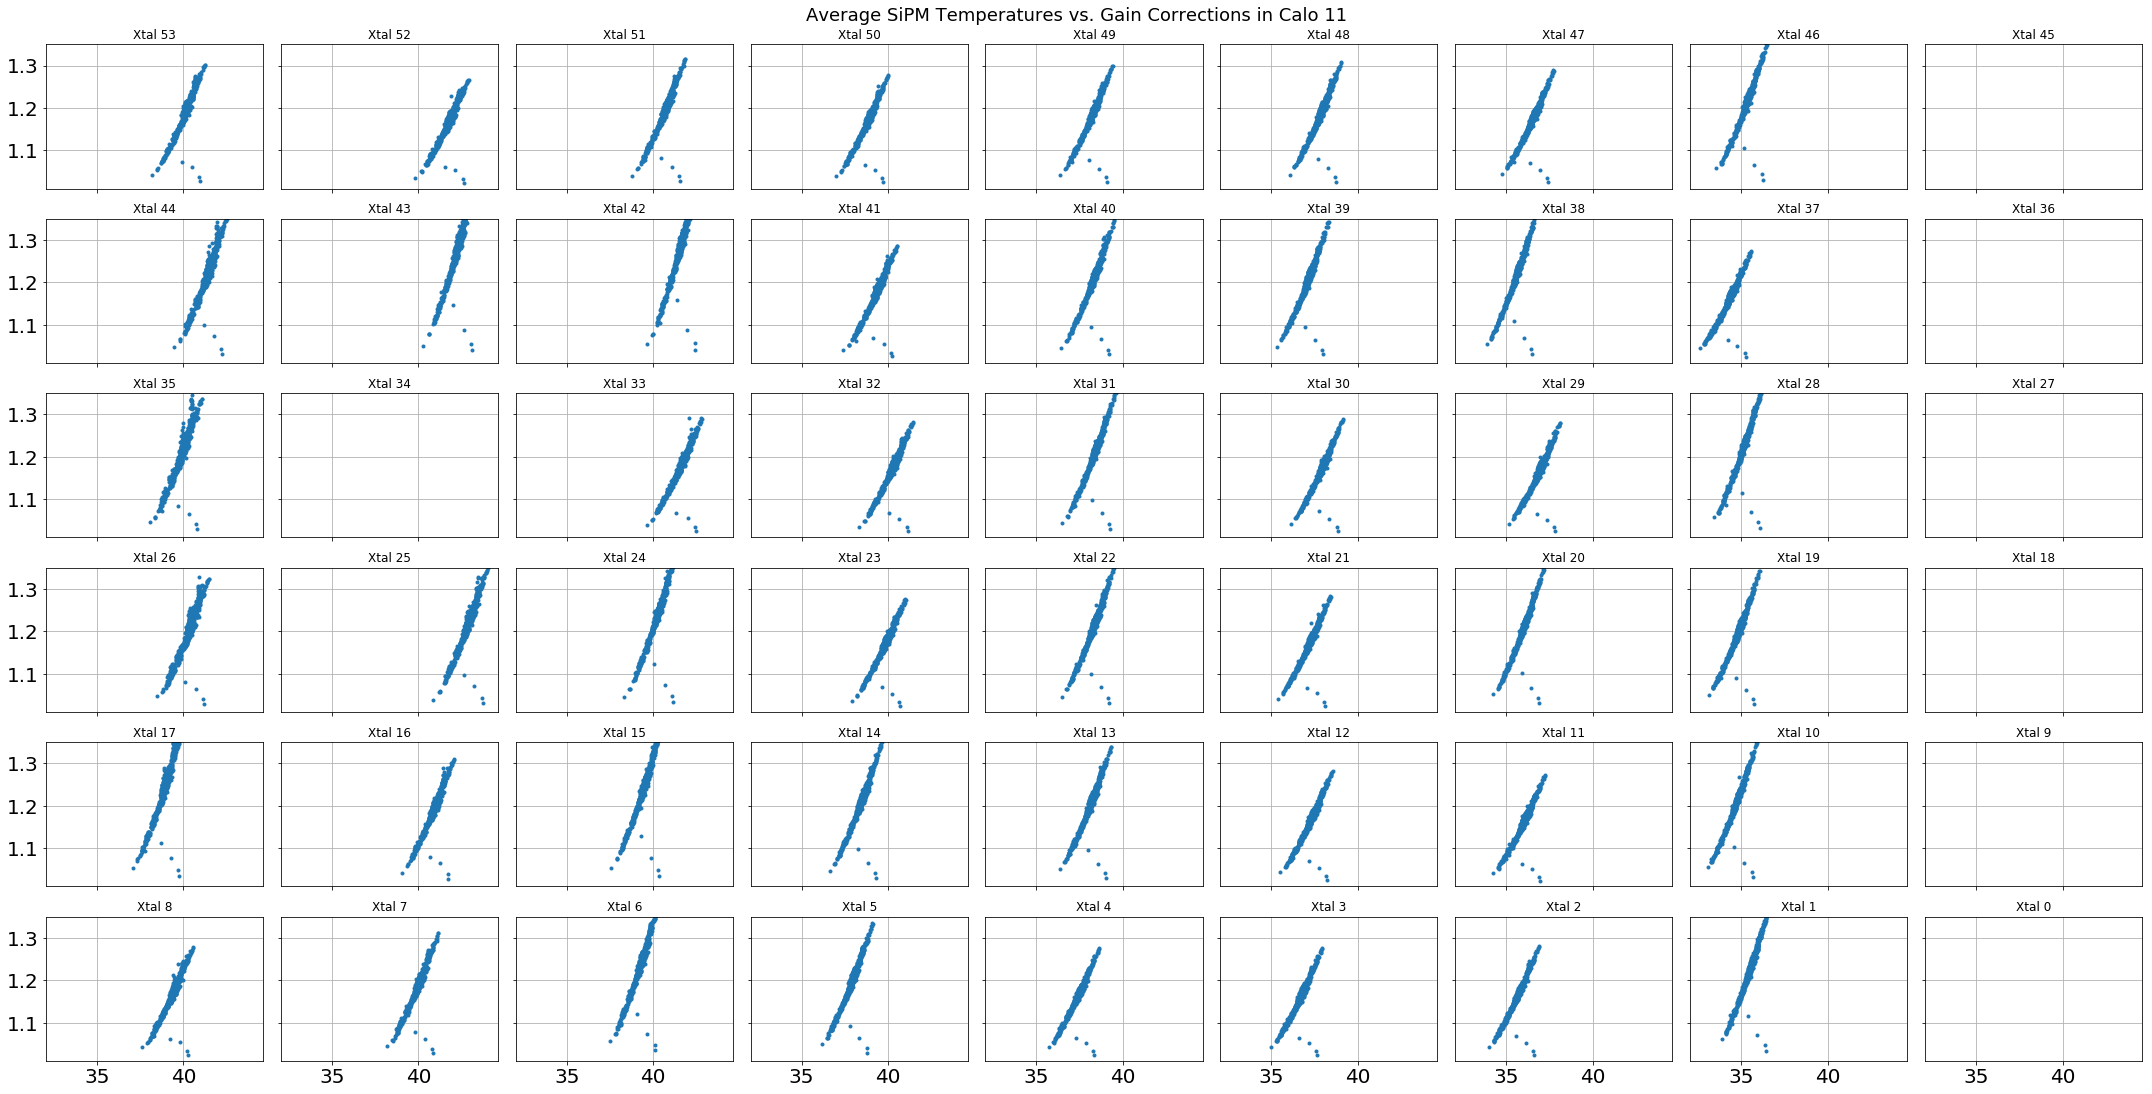

In [43]:
fig, ax = plt.subplots(height,width,figsize=(30,15),sharex = True, sharey = True)
calo = 11
for xtal in range(54):
    i = xtal
    axi = ax[int((53-i)/width)][(53 - i) % width]
    axi.set_title("Xtal "+str(xtal))
    axi.set_ylim(1.01,1.35)
    
    dfTempsVsConstsi = dfTempsVsConsts.loc[dfTempsVsConsts['xtal'] == xtal].loc[dfTempsVsConsts['calo'] == calo]
    axi.plot(dfTempsVsConstsi['temp'],dfTempsVsConstsi['const'],".")
    
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    #plt.xticks(rotation=60)
    ax.grid(True,axis="both")

plt.suptitle("Average SiPM Temperatures vs. Gain Corrections in Calo "+str(calo), fontsize=18, y = 1.01)
plt.tight_layout()
#plt.legend()
plt.show()

In [44]:
dfTempsVsConstsi.head()

,run,calo,xtal,const,temp
53,24376,11,53,1.133713,39.586758
107,24377,11,53,1.127270,39.439742
161,24378,11,53,1.112505,39.312500
215,24379,11,53,1.113520,39.256944
269,24380,11,53,1.110414,39.208333


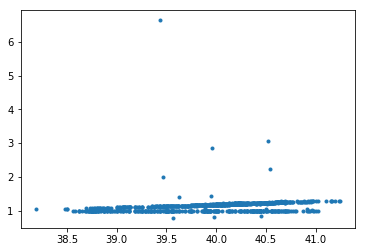

In [47]:
setint()
plt.plot(dfTempsVsConstsi['temp'],dfTempsVsConstsi['const'],".")
plt.show()

In [49]:
ding = dfTempsVsConstsi.loc[dfTempsVsConstsi['temp'] > 39.5].loc[dfTempsVsConstsi['const'] > 1.01].loc[dfTempsVsConstsi['const'] < 1.1]

In [50]:
ding.describe()

,run,calo,xtal,const,temp
count,4.000000,4.0,4.0,4.000000,4.000000
mean,25722.250000,11.0,53.0,1.049181,40.568701
std,836.986011,0.0,0.0,0.020557,0.498539
min,24468.000000,11.0,53.0,1.026805,39.888021
25%,25683.000000,11.0,53.0,1.034938,40.350755
50%,26126.500000,11.0,53.0,1.049171,40.710752
75%,26165.750000,11.0,53.0,1.063414,40.928697
max,26168.000000,11.0,53.0,1.071577,40.965278


In [51]:
ding.head()

,run,calo,xtal,const,temp
2753,24468,11,53,1.071577,39.888021
47303,26088,11,53,1.060693,40.505000
50165,26165,11,53,1.026805,40.965278
50327,26168,11,53,1.037649,40.916504
